# Housing Analysis Project

**Author**: Sierra Stanton
***

## Overview
***
This project analyses the housing industry as we compile valuable intel for homeowners considering whether home improvement projects will add value to the sale value of their homes. We have been charged with helping a client in King County, WA forecast the potential monetary effects of particular home improvement projects in their county. We'll use X datasets to TBD.

![Home Improvement](/images/90s-home-improvement-tim-allen-8Rf3xSwC1R39u.gif)

## Business Problem
***
A client in King County, WA wants to advise homeowners on home improvement projects that will add to the sale value of their homes.

These three claims can be addressed directly with the three datasets (from the King County Department of Assessments) described later in this document:

Enclosing a porch will increase the sale price of a home.1
Converting a garage to a bedroom is a good way to increase the sale price of a home.2
Upgrading to a forced-air heating system will increase the sale price of a home.3,4
Your task is to build a linear regression model to represent home sale prices in King County, and use it to advise homeowners on which home improvement projects will add to their home sale values.

## Data Understanding

Data will be used from the following source:
* __[XY](https://google.com)__

Look Up (`EXTR_LookUp.csv`): this dataset serves as a dictionary, providing two sets of identifying numbers that equate to real-world information about land.

Parcel Records (`EXTR_Parcel.csv`): this dataset

Residential Building Records (`EXTR_ResBldg.csv`): this dataset

Real Property Sale Records (`EXTR_RPSale.csv`): this dataset

EXPLAIN THEY ARE ALL FROM THE SAME SOURCE, IF THEY ARE
With four separate data sets, these descriptions might be better under the import itself.

In [1]:
# import standard packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [2]:
# extend the amount of displayed rows for expanded previewing

pd.options.display.max_rows = 1000

In [3]:
# create function to explore data sets

def explore_data(df):
    print(df.info(), '\n\n', 
    df.head(), '\n\n', 
    df.describe(), '\n\n')

### Import: Look Up

In [4]:
# import EXTR_LookUp.csv from our data folder

df_lookup = pd.read_csv('../../data/raw/EXTR_LookUp.csv', dtype=str)
explore_data(df_lookup)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LUType         1208 non-null   object
 1   LUItem         1208 non-null   object
 2   LUDescription  1208 non-null   object
dtypes: object(3)
memory usage: 28.4+ KB
None 

   LUType LUItem                                      LUDescription
0    1      1    LAND ONLY                                     ...
1    1      10   Land with new building                        ...
2    1      11   Household, single family units                ...
3    1      12   Multiple family residence (Residential, 2-4 un...
4    1      13   Multiple family residence (Residential, 5+ uni... 

        LUType LUItem                                      LUDescription
count    1208   1208                                               1208
unique     73    405                                               1104
top      

### Import: Parcel Records

In [5]:
# import EXTR_Parcel.csv from our data folder

df_parcel = pd.read_csv('../../data/raw/EXTR_Parcel.csv', dtype=str)
explore_data(df_parcel)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205199 entries, 0 to 205198
Data columns (total 82 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              205199 non-null  object
 1   Major                   205199 non-null  object
 2   Minor                   205199 non-null  object
 3   PropName                196088 non-null  object
 4   PlatName                176654 non-null  object
 5   PlatLot                 205199 non-null  object
 6   PlatBlock               205199 non-null  object
 7   Range                   205199 non-null  object
 8   Township                205199 non-null  object
 9   Section                 205199 non-null  object
 10  QuarterSection          205199 non-null  object
 11  PropType                205199 non-null  object
 12  Area                    205193 non-null  object
 13  SubArea                 205193 non-null  object
 14  SpecArea                4864 non-nul

After previewing Parcel Records, we can see that this dataframe provides ample data when zeroing in on a particular plat of land, and could enable us to filter for particular property types that are relevant to our client. It seems we could also better understand the restrictions or allowances around revovations.

In [6]:
df_parcel.DistrictName.unique

<bound method Series.unique of 0           SAMMAMISH
1             SEATTLE
2         KING COUNTY
3           SHORELINE
4            KIRKLAND
             ...     
205194        SEATTLE
205195        SEATTLE
205196         RENTON
205197         AUBURN
205198        SEATTLE
Name: DistrictName, Length: 205199, dtype: object>

When I search within location-based fields like above there seems to be such a range that I don't see immediate relevancy.

### Import: Residential Building Records

In [7]:
# import EXTR_ResBldg.csv from our data folder

df_resbldg = pd.read_csv('../../data/raw/EXTR_ResBldg.csv', dtype=str)
explore_data(df_resbldg)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181510 entries, 0 to 181509
Data columns (total 50 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Major               181510 non-null  object
 1   Minor               181510 non-null  object
 2   BldgNbr             181510 non-null  object
 3   NbrLivingUnits      181510 non-null  object
 4   Address             181510 non-null  object
 5   BuildingNumber      181510 non-null  object
 6   Fraction            181510 non-null  object
 7   DirectionPrefix     181146 non-null  object
 8   StreetName          181510 non-null  object
 9   StreetType          181510 non-null  object
 10  DirectionSuffix     181146 non-null  object
 11  ZipCode             154594 non-null  object
 12  Stories             181510 non-null  object
 13  BldgGrade           181510 non-null  object
 14  BldgGradeVar        181510 non-null  object
 15  SqFt1stFloor        181510 non-null  object
 16  Sq

### Import: Real Property Sale Records

In [8]:
# import EXTR_RPSale.csv from our data folder

df_rpsale = pd.read_csv('../../data/raw/EXTR_RPSale.csv', dtype=str)
explore_data(df_rpsale)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351067 entries, 0 to 351066
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ExciseTaxNbr        351067 non-null  object
 1   Major               351067 non-null  object
 2   Minor               351067 non-null  object
 3   DocumentDate        351067 non-null  object
 4   SalePrice           351067 non-null  object
 5   RecordingNbr        351067 non-null  object
 6   Volume              351067 non-null  object
 7   Page                351067 non-null  object
 8   PlatNbr             351067 non-null  object
 9   PlatType            351067 non-null  object
 10  PlatLot             351067 non-null  object
 11  PlatBlock           351067 non-null  object
 12  SellerName          351067 non-null  object
 13  BuyerName           351067 non-null  object
 14  PropertyType        351067 non-null  object
 15  PrincipalUse        351067 non-null  object
 16  Sa

## Data Preparation

Explain that Look Up is the exception regarding clean-up

### Clean Up: Parcel Records

In this dataframe, we'll take the following actions:

#### Step One:

Explanation

In [9]:
# columns I care about here
# Major, Minor
# PropType
# Wait until later to consider merge as we might have enough already

### Clean Up: Residential Building Records

In this dataframe, we'll take the following actions:

#### Step One:

Explanation

In [10]:
# combine Major and Minor to create a unique ID

df_resbldg["UniqueId"] = df_resbldg["Major"] + df_resbldg["Minor"]
display(df_resbldg.UniqueId.describe())
df_resbldg.head()

count         181510
unique        179476
top       0822119001
freq              21
Name: UniqueId, dtype: object

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,UniqueId
0,009800,0720,1,1,27719 SE 26TH WAY 98075,27719,,SE,26TH,WAY,...,0,0,2001,0,0,0,0,3,0,0098000720
1,009802,0140,1,1,2829 277TH TER SE 98075,2829,,,277TH,TER,...,0,0,2004,0,0,0,0,3,0,0098020140
2,009830,0020,1,1,1715 298TH CRESENT SE,1715,,,298TH CRESENT,,...,0,0,2017,0,0,0,0,3,0,0098300020
3,009830,0160,1,1,1861 297TH WAY SE 98024,1861,,,297TH,WAY,...,0,0,2013,0,0,0,0,3,0,0098300160
4,010050,0180,1,1,35410 25TH PL S 98003,35410,,,25TH,PL,...,0,0,1994,0,0,0,0,4,0,0100500180


We can see there aren't too many duplicate values, and therefore we should be able to drop duplicate ID's in order to gain more model accuracy down the line.

In [11]:
# remove minor amount of duplicate Ids

df_resbldg.drop_duplicates(subset=['UniqueId'], inplace=True)

In [12]:
df_resbldg.UniqueId.describe()

count         179476
unique        179476
top       4083800965
freq               1
Name: UniqueId, dtype: object

In [13]:
# create syntehsized dataframe with most relevant columns for the client claims we're analyzing

narrow_resbldg = list(df_resbldg.columns)
narrow_resbldg = [narrow_resbldg[50]] + [narrow_resbldg[29]] + [narrow_resbldg[25]] + [narrow_resbldg[26]] + [narrow_resbldg[35]]

narrow_df_resbldg = df_resbldg[narrow_resbldg]
narrow_df_resbldg.head()

,UniqueId,SqFtEnclosedPorch,SqFtGarageBasement,SqFtGarageAttached,Bedrooms
0,0098000720,0,0,750,4
1,0098020140,0,0,660,4
2,0098300020,0,0,1020,4
3,0098300160,0,0,1000,4
4,0100500180,0,0,440,3


In [14]:
# add additional columns that show a high degree of potential relevancy 

narrow_resbldg = list(df_resbldg.columns)
narrow_resbldg = [narrow_resbldg[50]] + [narrow_resbldg[29]] + [narrow_resbldg[25]] + [narrow_resbldg[26]] + [narrow_resbldg[35]] + [narrow_resbldg[3]] + [narrow_resbldg[21]] + [narrow_resbldg[43]] + [narrow_resbldg[44]] + [narrow_resbldg[45]]  + [narrow_resbldg[48]]

narrow_df_resbldg = df_resbldg[narrow_resbldg]
narrow_df_resbldg.head()

,UniqueId,SqFtEnclosedPorch,SqFtGarageBasement,SqFtGarageAttached,Bedrooms,NbrLivingUnits,SqFtTotLiving,YrBuilt,YrRenovated,PcntComplete,Condition
0,0098000720,0,0,750,4,1,4100,2001,0,0,3
1,0098020140,0,0,660,4,1,3010,2004,0,0,3
2,0098300020,0,0,1020,4,1,5080,2017,0,0,3
3,0098300160,0,0,1000,4,1,4070,2013,0,0,3
4,0100500180,0,0,440,3,1,1610,1994,0,0,4


### Clean Up: Real Property Sale Records

In this dataframe, we'll take the following actions:

#### Step One:

Explanation

In [15]:
# combine Major and Minor to create a unique ID

df_rpsale["UniqueId"] = df_rpsale["Major"] + df_rpsale["Minor"]
display(df_rpsale.UniqueId.describe())
df_resbldg.head()

count         351067
unique        252962
top       0660002310
freq              83
Name: UniqueId, dtype: object

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,UniqueId
0,009800,0720,1,1,27719 SE 26TH WAY 98075,27719,,SE,26TH,WAY,...,0,0,2001,0,0,0,0,3,0,0098000720
1,009802,0140,1,1,2829 277TH TER SE 98075,2829,,,277TH,TER,...,0,0,2004,0,0,0,0,3,0,0098020140
2,009830,0020,1,1,1715 298TH CRESENT SE,1715,,,298TH CRESENT,,...,0,0,2017,0,0,0,0,3,0,0098300020
3,009830,0160,1,1,1861 297TH WAY SE 98024,1861,,,297TH,WAY,...,0,0,2013,0,0,0,0,3,0,0098300160
4,010050,0180,1,1,35410 25TH PL S 98003,35410,,,25TH,PL,...,0,0,1994,0,0,0,0,4,0,0100500180


In [16]:
df_rpsale.UniqueId.describe()

count         351067
unique        252962
top       0660002310
freq              83
Name: UniqueId, dtype: object

In [17]:
# remove minor amount of duplicate Ids

df_rpsale.drop_duplicates(subset=['UniqueId'], inplace=True)

In [18]:
df_rpsale.UniqueId.describe()

count         252962
unique        252962
top       8681670070
freq               1
Name: UniqueId, dtype: object

In [19]:
# create syntehsized dataframe with most relevant columns for the client claims we're analyzing

narrow_rpsale = list(df_rpsale.columns)
narrow_rpsale = [narrow_rpsale[24]] + [narrow_rpsale[4]]

narrow_df_rpsale = df_rpsale[narrow_rpsale]
narrow_df_rpsale.head()

,UniqueId,SalePrice
0,1989201430,0
1,6385800110,190000
2,9197150200,192000
3,8946770240,818161
4,4458720260,0


In [20]:
df_rpsale.PrincipalUse.describe()

count     252962
unique        12
top            6
freq      192650
Name: PrincipalUse, dtype: object

In [21]:
# add additional columns that show a high degree of potential relevancy 

narrow_rpsale = list(df_rpsale.columns)
narrow_rpsale = [narrow_rpsale[24]] + [narrow_rpsale[4]] + [narrow_rpsale[3]] + [narrow_rpsale[14]] + [narrow_rpsale[15]] + [narrow_rpsale[21]]

narrow_df_rpsale = df_rpsale[narrow_rpsale]
narrow_df_rpsale.head()

,UniqueId,SalePrice,DocumentDate,PropertyType,PrincipalUse,SaleReason
0,1989201430,0,03/28/2017,3,7,16
1,6385800110,190000,07/14/2015,3,6,1
2,9197150200,192000,07/08/2019,3,2,1
3,8946770240,818161,12/21/2016,2,6,1
4,4458720260,0,10/03/2016,3,2,18


### Merge our Data Sets

Let's merge our datasets according to the Major and Minor columns.

In [33]:
# merge synthesized Residential Building Records with synthesized Real Property Sale Records

merged_dataframe = narrow_df_resbldg.merge(narrow_df_rpsale, on='UniqueId', how='inner')
display(merged_dataframe.head())
merged_dataframe.info()

,UniqueId,SqFtEnclosedPorch,SqFtGarageBasement,SqFtGarageAttached,Bedrooms,NbrLivingUnits,SqFtTotLiving,YrBuilt,YrRenovated,PcntComplete,Condition,SalePrice,DocumentDate,PropertyType,PrincipalUse,SaleReason
0,0098000720,0,0,750,4,1,4100,2001,0,0,3,1300000,06/14/2018,11,6,1
1,0098020140,0,0,660,4,1,3010,2004,0,0,3,0,04/17/2020,11,6,18
2,0098300020,0,0,1020,4,1,5080,2017,0,0,3,1849000,03/22/2018,2,6,1
3,0098300160,0,0,1000,4,1,4070,2013,0,0,3,1229000,05/26/2015,2,6,1
4,0100500180,0,0,440,3,1,1610,1994,0,0,4,261200,07/07/2016,3,6,4


<class 'pandas.core.frame.DataFrame'>
Int64Index: 179476 entries, 0 to 179475
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   UniqueId            179476 non-null  object
 1   SqFtEnclosedPorch   179476 non-null  object
 2   SqFtGarageBasement  179476 non-null  object
 3   SqFtGarageAttached  179476 non-null  object
 4   Bedrooms            179476 non-null  object
 5   NbrLivingUnits      179476 non-null  object
 6   SqFtTotLiving       179476 non-null  object
 7   YrBuilt             179476 non-null  object
 8   YrRenovated         179476 non-null  object
 9   PcntComplete        179476 non-null  object
 10  Condition           179476 non-null  object
 11  SalePrice           179476 non-null  object
 12  DocumentDate        179476 non-null  object
 13  PropertyType        179476 non-null  object
 14  PrincipalUse        179476 non-null  object
 15  SaleReason          179476 non-null  object
dtypes:

In [34]:
# reorder so target variable, sale price, is shown first

columns = list(merged_dataframe.columns)
columns = [columns[11]] + columns[:11] + columns[12:]
merged_dataframe = merged_dataframe[columns]
merged_dataframe.head()

,SalePrice,UniqueId,SqFtEnclosedPorch,SqFtGarageBasement,SqFtGarageAttached,Bedrooms,NbrLivingUnits,SqFtTotLiving,YrBuilt,YrRenovated,PcntComplete,Condition,DocumentDate,PropertyType,PrincipalUse,SaleReason
0,1300000,0098000720,0,0,750,4,1,4100,2001,0,0,3,06/14/2018,11,6,1
1,0,0098020140,0,0,660,4,1,3010,2004,0,0,3,04/17/2020,11,6,18
2,1849000,0098300020,0,0,1020,4,1,5080,2017,0,0,3,03/22/2018,2,6,1
3,1229000,0098300160,0,0,1000,4,1,4070,2013,0,0,3,05/26/2015,2,6,1
4,261200,0100500180,0,0,440,3,1,1610,1994,0,0,4,07/07/2016,3,6,4


In [40]:
# eliminate rows where there isn't a recorded sale price

# merged_dataframe['SalePrice'] = merged_dataframe['SalePrice'].astype(int)
# merged_dataframe.drop(merged_dataframe[merged_dataframe['SalePrice'] < 1])

KeyError: "['SalePrice' 'UniqueId' 'SqFtEnclosedPorch' 'SqFtGarageBasement'\n 'SqFtGarageAttached' 'Bedrooms' 'NbrLivingUnits' 'SqFtTotLiving'\n 'YrBuilt' 'YrRenovated' 'PcntComplete' 'Condition' 'DocumentDate'\n 'PropertyType' 'PrincipalUse' 'SaleReason'] not found in axis"

### Data Modeling

In [37]:
# create correlation matrix to identify our most useful columns

corr = merged_dataframe.corr()

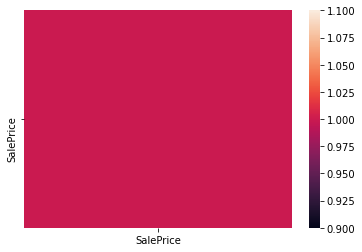

In [38]:
sns.heatmap(corr);

In [ ]:
# create readable correlation matrix to identify our most useful columns

correlation_matrix = merged_dataframe.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(correlation_matrix, mask=mask, ax=ax1, cmap="viridis");

#correlation_matrix = df.corr()
#sns.heatmap(correlation_matrix)

In [ ]:
merged_dataframe.corr()

In [ ]:
# build a linear regression model



In [ ]:
# print out model's metrics



### Evaluation